In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#nasdaq_api_key = os.getenv("NASDAQ_API_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY','CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
           'BRK.B', 'V', 'COST', 'PG', 'UEEC.A', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 
           'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
           'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2021-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-05-02', tz='America/New_York').isoformat()

In [6]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [7]:
# Review the first 5 rows of the Alpaca DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
#for i,r in ticker_data.tail(1).iterrows():
    #print(r)
#ticker_data[ticker_data['symbol']=='BRK.B'].drop('symbol', axis=1).dropna()
#ticker_data[ticker_data['symbol']=='UEEC.A'].drop('symbol', axis=1).dropna()

In [8]:
# Set drop_columns variable
drop_columns = ['open', 'symbol', 'vwap', 'volume', 'trade_count', 'high', 'low']

In [9]:
# Reorganize the DataFrame
# Separate ticker data
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop(drop_columns, axis=1).dropna()
CAT = ticker_data[ticker_data['symbol']=='CAT'].drop(drop_columns, axis=1).dropna()
DHR = ticker_data[ticker_data['symbol']=='DHR'].drop(drop_columns, axis=1).dropna()
RTX = ticker_data[ticker_data['symbol']=='RTX'].drop(drop_columns, axis=1).dropna()
AAPL = ticker_data[ticker_data['symbol']=='AAPL'].drop(drop_columns, axis=1).dropna()
SOFI = ticker_data[ticker_data['symbol']=='SOFI'].drop(drop_columns, axis=1).dropna()
DIS = ticker_data[ticker_data['symbol']=='DIS'].drop(drop_columns, axis=1).dropna()
JPM = ticker_data[ticker_data['symbol']=='JPM'].drop(drop_columns, axis=1).dropna()
WMT = ticker_data[ticker_data['symbol']=='WMT'].drop(drop_columns, axis=1).dropna()
XOM = ticker_data[ticker_data['symbol']=='XOM'].drop(drop_columns, axis=1).dropna()
COP = ticker_data[ticker_data['symbol']=='COP'].drop(drop_columns, axis=1).dropna()
BRK = ticker_data[ticker_data['symbol']=='BRK.B'].drop(drop_columns, axis=1).dropna()
V = ticker_data[ticker_data['symbol']=='V'].drop(drop_columns, axis=1).dropna()
COST = ticker_data[ticker_data['symbol']=='COST'].drop(drop_columns, axis=1).dropna()
PG = ticker_data[ticker_data['symbol']=='PG'].drop(drop_columns, axis=1).dropna()
UEEC = ticker_data[ticker_data['symbol']=='UEEC'].drop(drop_columns, axis=1).dropna()
NVDA = ticker_data[ticker_data['symbol']=='NVDA'].drop(drop_columns, axis=1).dropna()
HD = ticker_data[ticker_data['symbol']=='HD'].drop(drop_columns, axis=1).dropna()
PTON = ticker_data[ticker_data['symbol']=='PTON'].drop(drop_columns, axis=1).dropna()
LUV = ticker_data[ticker_data['symbol']=='LUV'].drop(drop_columns, axis=1).dropna()
MU = ticker_data[ticker_data['symbol']=='MU'].drop(drop_columns, axis=1).dropna()
MSFT = ticker_data[ticker_data['symbol']=='MSFT'].drop(drop_columns, axis=1).dropna()
FB = ticker_data[ticker_data['symbol']=='FB'].drop(drop_columns, axis=1).dropna()
NFLX = ticker_data[ticker_data['symbol']=='NFLX'].drop(drop_columns, axis=1).dropna()
GSL = ticker_data[ticker_data['symbol']=='GSL'].drop(drop_columns, axis=1).dropna()
IDT = ticker_data[ticker_data['symbol']=='IDT'].drop(drop_columns, axis=1).dropna()
GBT = ticker_data[ticker_data['symbol']=='GBT'].drop(drop_columns, axis=1).dropna()
PTLO = ticker_data[ticker_data['symbol']=='PTLO'].drop(drop_columns, axis=1).dropna()
SKIN = ticker_data[ticker_data['symbol']=='SKIN'].drop(drop_columns, axis=1).dropna()
ORGN = ticker_data[ticker_data['symbol']=='ORGN'].drop(drop_columns, axis=1).dropna()
TITN = ticker_data[ticker_data['symbol']=='TITN'].drop(drop_columns, axis=1).dropna()
BXC = ticker_data[ticker_data['symbol']=='BXC'].drop(drop_columns, axis=1).dropna()

In [10]:
# Concatenate the ticker DataFrames
ticker_data = pd.concat([CAT, DHR, RTX, AAPL, SOFI, DIS, JPM, WMT, XOM, COP,
BRK, V, COST, PG, NVDA, HD, PTON, LUV, MU, MSFT, FB, NFLX, GSL, IDT, GBT, 
PTLO, SKIN, ORGN, TITN, BXC], axis=1, keys=['CAT', 'DHR', 'RTX', 'AAPL', 'SOFI', 'DIS', 'JPM', 'WMT', 'XOM', 'COP',
'BRK-B', 'V', 'COST', 'PG', 'NVDA', 'HD', 'PTON', 'LUV', 'MU', 'MSFT', 'FB', 'NFLX', 'GSL', 'IDT', 'GBT', 
'PTLO', 'SKIN', 'ORGN', 'TITN', 'BXC'])

In [11]:
ticker_data.dropna().copy()

,CAT,DHR,RTX,AAPL,SOFI,DIS,JPM,WMT,XOM,COP,BRK-B,V,COST,PG,NVDA,HD,PTON,LUV,MU,MSFT,FB,NFLX,GSL,IDT,GBT,PTLO,SKIN,ORGN,TITN,BXC
,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-21 04:00:00+00:00,202.14,310.74,91.61,149.480,20.9900,171.34,169.50,146.81,62.69,74.59,286.82,230.24,477.23,139.33,226.92,364.62,94.830,48.66,68.64,310.76,341.88,653.16,23.350,48.05,31.36,29.10,27.21,6.0800,28.76,49.85
2021-10-22 04:00:00+00:00,200.65,313.38,91.86,148.690,20.5800,169.42,171.78,148.34,63.12,75.72,289.24,231.23,481.99,140.83,227.26,365.99,93.830,47.63,67.51,309.16,324.61,664.78,23.420,47.29,31.57,37.43,27.04,5.8800,28.40,49.36
2021-10-25 04:00:00+00:00,202.21,306.10,91.30,148.640,20.6900,172.01,170.94,150.06,64.35,76.52,290.26,233.88,490.10,140.85,231.66,371.26,96.600,47.48,68.76,308.13,328.69,671.66,23.830,46.96,30.86,42.01,27.55,5.9900,28.97,51.81
2021-10-26 04:00:00+00:00,199.64,306.93,89.16,149.320,19.9600,172.04,171.40,148.75,65.84,77.03,290.85,231.82,485.53,142.85,247.17,369.20,93.460,47.59,68.94,310.11,315.81,668.52,23.150,46.65,30.00,41.99,27.26,5.8200,27.84,49.12
2021-10-27 04:00:00+00:00,196.13,305.24,89.16,148.850,19.2500,169.55,167.83,147.53,64.13,74.43,287.78,215.78,489.11,141.83,244.51,372.32,88.450,46.57,68.24,323.17,312.22,662.92,22.100,46.51,32.78,40.31,25.91,5.7600,27.32,47.03
2021-10-28 04:00:00+00:00,204.09,304.57,89.19,152.570,19.9100,169.68,170.36,148.45,64.31,75.15,289.72,209.84,490.53,142.68,249.41,371.57,90.310,47.24,69.58,324.35,316.92,674.05,23.180,47.04,36.33,37.31,26.97,6.1100,28.01,47.83
2021-10-29 04:00:00+00:00,204.01,311.77,88.86,149.800,20.0900,169.07,169.89,149.42,64.47,74.49,287.01,211.77,491.54,142.99,255.67,371.74,91.440,47.28,69.10,331.62,323.57,690.31,23.280,48.37,36.52,38.00,27.47,6.4400,28.42,47.63
2021-11-01 04:00:00+00:00,205.38,309.68,88.55,148.960,22.6200,170.19,169.80,149.79,65.63,74.59,286.24,212.46,491.87,142.64,258.27,366.48,92.830,49.13,70.70,329.37,329.98,681.17,24.130,51.43,38.94,41.76,27.89,6.9600,29.15,49.75


In [12]:
# Prepare the data for analysis by converting values to daily returns
daily_returns = ticker_data.pct_change().dropna()

In [13]:
# Preview the data
daily_returns.head()

,CAT,DHR,RTX,AAPL,SOFI,DIS,JPM,WMT,XOM,COP,BRK-B,V,COST,PG,NVDA,HD,PTON,LUV,MU,MSFT,FB,NFLX,GSL,IDT,GBT,PTLO,SKIN,ORGN,TITN,BXC
,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-22 04:00:00+00:00,-0.007371,0.008496,0.002729,-0.005285,-0.019533,-0.011206,0.013451,0.010422,0.006859,0.015149,0.008437,0.004300,0.009974,0.010766,0.001498,0.003757,-0.010545,-0.021167,-0.016463,-0.005149,-0.050515,0.017790,0.002998,-0.015817,0.006696,0.286254,-0.006248,-0.032895,-0.012517,-0.009829
2021-10-25 04:00:00+00:00,0.007775,-0.023231,-0.006096,-0.000336,0.005345,0.015287,-0.004890,0.011595,0.019487,0.010565,0.003526,0.011460,0.016826,0.000142,0.019361,0.014399,0.029521,-0.003149,0.018516,-0.003332,0.012569,0.010349,0.017506,-0.006978,-0.022490,0.122362,0.018861,0.018707,0.020070,0.049635
2021-10-26 04:00:00+00:00,-0.012710,0.002712,-0.023439,0.004575,-0.035283,0.000174,0.002691,-0.008730,0.023155,0.006665,0.002033,-0.008808,-0.009325,0.014200,0.066952,-0.005549,-0.032505,0.002317,0.002618,0.006426,-0.039186,-0.004675,-0.028535,-0.006601,-0.027868,-0.000476,-0.010526,-0.028381,-0.039006,-0.051920
2021-10-27 04:00:00+00:00,-0.017582,-0.005506,0.000000,-0.003148,-0.035571,-0.014473,-0.020828,-0.008202,-0.025972,-0.033753,-0.010555,-0.069192,0.007373,-0.007140,-0.010762,0.008451,-0.053606,-0.021433,-0.010154,0.042114,-0.011368,-0.008377,-0.045356,-0.003001,0.092667,-0.040010,-0.049523,-0.010309,-0.018678,-0.042549
2021-10-28 04:00:00+00:00,0.040585,-0.002195,0.000336,0.024992,0.034286,0.000767,0.015075,0.006236,0.002807,0.009674,0.006741,-0.027528,0.002903,0.005993,0.020040,-0.002014,0.021029,0.014387,0.019637,0.003651,0.015053,0.016789,0.048869,0.011395,0.108298,-0.074423,0.040911,0.060764,0.025256,0.017010


<AxesSubplot:title={'center':'Daily Returns vs. Market'}, xlabel='timestamp'>

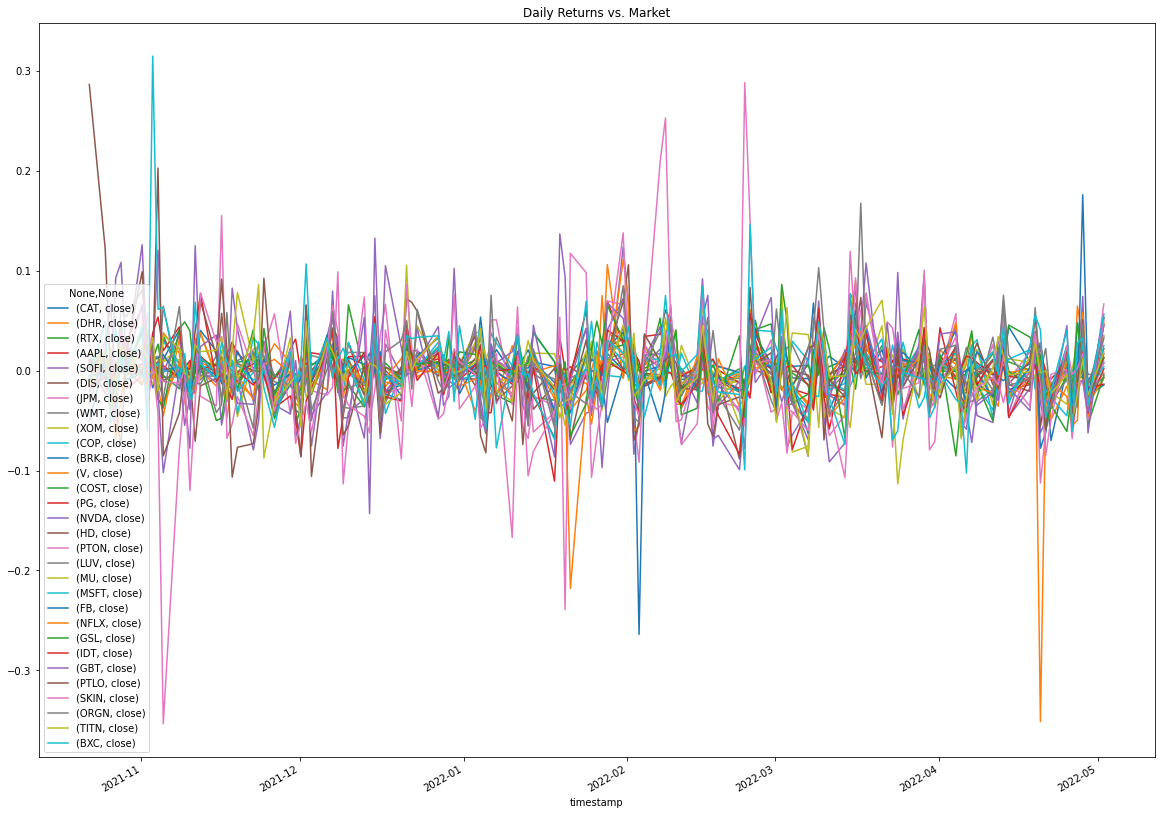

In [14]:
# Plot the daily returns of each stock vs the market proxy
daily_returns.plot(figsize=(20,15), title='Daily Returns vs. Market')

In [15]:
# calculate the cumulative returns of each variable
cumulative_returns = (1 + daily_returns).cumprod()

In [16]:
# review tail of cumulative returns df
cumulative_returns.tail()

In [16]:
# calculate the mean 

,CAT,DHR,RTX,AAPL,SOFI,DIS,JPM,WMT,XOM,COP,BRK-B,V,COST,PG,NVDA,HD,PTON,LUV,MU,MSFT,FB,NFLX,GSL,IDT,GBT,PTLO,SKIN,ORGN,TITN,BXC
,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-26 04:00:00+00:00,1.040368,0.807685,1.082742,1.048970,0.299667,0.675674,0.725782,1.057830,1.312650,1.224293,1.152814,0.873436,1.160363,1.146846,0.827957,0.822665,0.200569,0.925195,0.977273,0.869546,0.529279,0.303754,0.920343,0.571696,1.044324,0.721993,0.489526,1.074013,0.850834,1.306118
2022-04-27 04:00:00+00:00,1.058474,0.811868,1.078922,1.047431,0.292997,0.672406,0.716342,1.050610,1.350136,1.247620,1.149083,0.929943,1.161033,1.143759,0.811519,0.827163,0.196562,0.944102,0.968386,0.911379,0.511729,0.288658,0.964454,0.565036,1.031250,0.702405,0.490628,1.034539,0.830668,1.341825
2022-04-28 04:00:00+00:00,1.050955,0.827058,1.070625,1.094728,0.307289,0.672873,0.727670,1.064028,1.390971,1.307816,1.154975,0.958391,1.177629,1.172827,0.871761,0.855027,0.194770,0.963831,1.022436,0.932005,0.601761,0.305469,0.965739,0.575442,1.021365,0.738144,0.499081,1.082237,0.840403,1.385356
2022-04-29 04:00:00+00:00,1.041555,0.808168,1.036022,1.054656,0.291567,0.651512,0.704189,1.042095,1.359866,1.280601,1.125549,0.925686,1.114180,1.152300,0.817337,0.823871,0.185173,0.960132,0.993444,0.893036,0.586375,0.291445,0.952463,0.551093,0.978954,0.715808,0.481441,1.067434,0.819889,1.337412
2022-05-02 04:00:00+00:00,1.049124,0.806205,1.028490,1.056730,0.301572,0.662426,0.710619,1.035216,1.378370,1.285963,1.109372,0.918737,1.108375,1.136726,0.860788,0.841890,0.197511,0.956227,1.028555,0.915401,0.617556,0.305377,0.964026,0.576275,1.023278,0.725086,0.505696,1.101974,0.835188,1.413240


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='timestamp'>

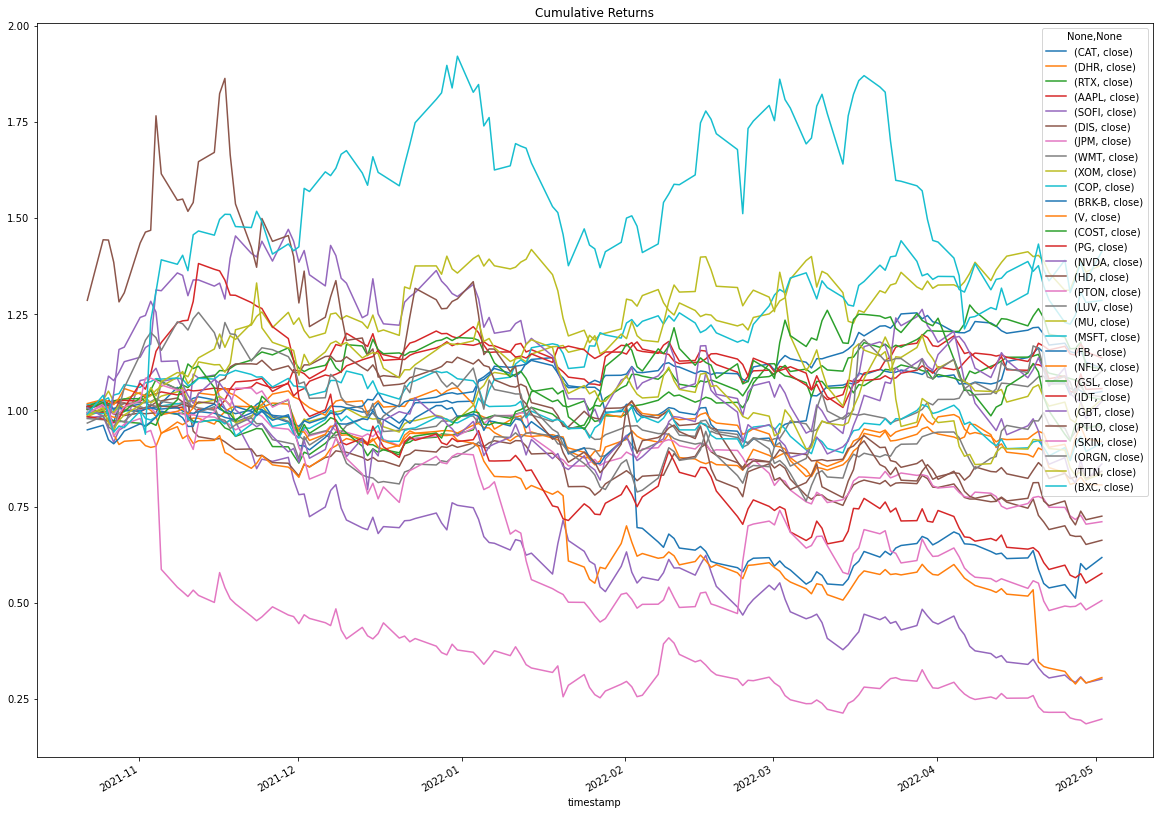

In [17]:
# Visulalize the cumulative returns
cumulative_returns.plot(figsize=(20,15), title='Cumulative Returns')

<AxesSubplot:title={'center':'Volatility'}>

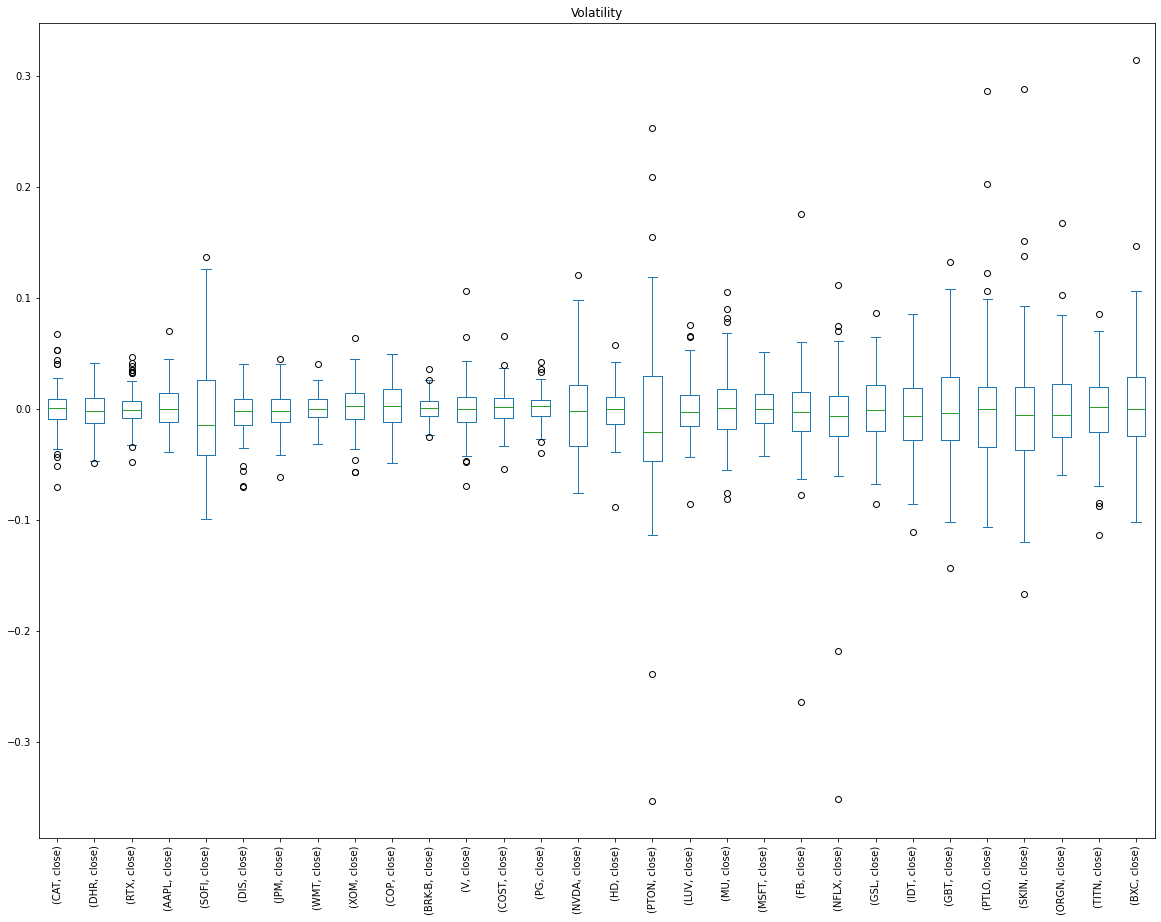

In [18]:
# use daily returns df to visualize volatility
daily_returns.plot(kind='box', figsize=(20,15), title='Volatility', rot=90)

In [19]:
# Calculate and sort the annualized standard deviation 
# Review the standard deviations sorted smallest to largest
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values()

BRK-B  close    0.178864
WMT    close    0.191098
PG     close    0.194138
RTX    close    0.242939
COST   close    0.260976
JPM    close    0.273615
HD     close    0.292170
CAT    close    0.292909
AAPL   close    0.293317
DHR    close    0.293559
DIS    close    0.303035
MSFT   close    0.311519
XOM    close    0.313981
V      close    0.348366
COP    close    0.350906
LUV    close    0.378985
MU     close    0.490799
GSL    close    0.498341
TITN   close    0.505892
IDT    close    0.558649
FB     close    0.599365
ORGN   close    0.602360
NVDA   close    0.647629
GBT    close    0.651736
NFLX   close    0.717242
BXC    close    0.775567
SOFI   close    0.798676
SKIN   close    0.842665
PTLO   close    0.869322
PTON   close    1.106778
dtype: float64

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

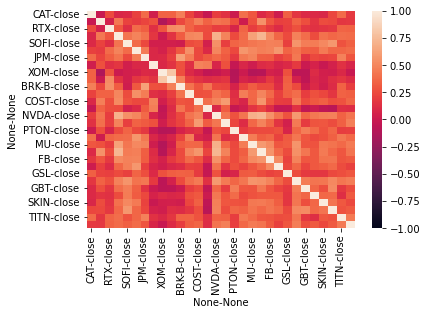

In [20]:
# calculate the correlation between returns and plot heatmap
correlation = daily_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

In [21]:
# sum total correlation for each stock
correlation.sum(axis=0).sort_values()

XOM    close     3.068642
WMT    close     4.664335
PG     close     4.894836
COP    close     5.693709
CAT    close     6.288630
PTON   close     6.389195
GSL    close     7.595780
GBT    close     7.809098
DHR    close     7.822045
NFLX   close     8.046897
RTX    close     8.060214
PTLO   close     8.158773
BRK-B  close     8.650374
SKIN   close     8.709083
LUV    close     9.178132
BXC    close     9.336422
TITN   close     9.342410
ORGN   close     9.404633
HD     close     9.420389
COST   close     9.781178
SOFI   close     9.820970
JPM    close     9.927243
V      close    10.042085
FB     close    10.595991
DIS    close    11.125907
MU     close    11.146940
IDT    close    11.704908
MSFT   close    11.787869
AAPL   close    11.915022
NVDA   close    12.151767
dtype: float64

In [22]:
# calculate annualized sharpe ratios
sharpe_ratios = (daily_returns.mean() * 252) / volatility
sharpe_ratios.sort_values()

NFLX   close   -2.728329
SOFI   close   -2.460380
DIS    close   -2.438654
JPM    close   -2.243898
PTON   close   -2.205391
IDT    close   -1.600881
DHR    close   -1.253529
FB     close   -1.215678
SKIN   close   -1.135451
HD     close   -0.977371
TITN   close   -0.425393
MSFT   close   -0.386912
V      close   -0.292881
PTLO   close   -0.292344
NVDA   close   -0.123884
LUV    close   -0.037928
GSL    close    0.107455
RTX    close    0.340911
MU     close    0.351036
GBT    close    0.390023
WMT    close    0.440509
CAT    close    0.457943
AAPL   close    0.504070
ORGN   close    0.599638
COST   close    0.882340
BRK-B  close    1.196826
BXC    close    1.216297
PG     close    1.357057
COP    close    1.543774
XOM    close    2.109546
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

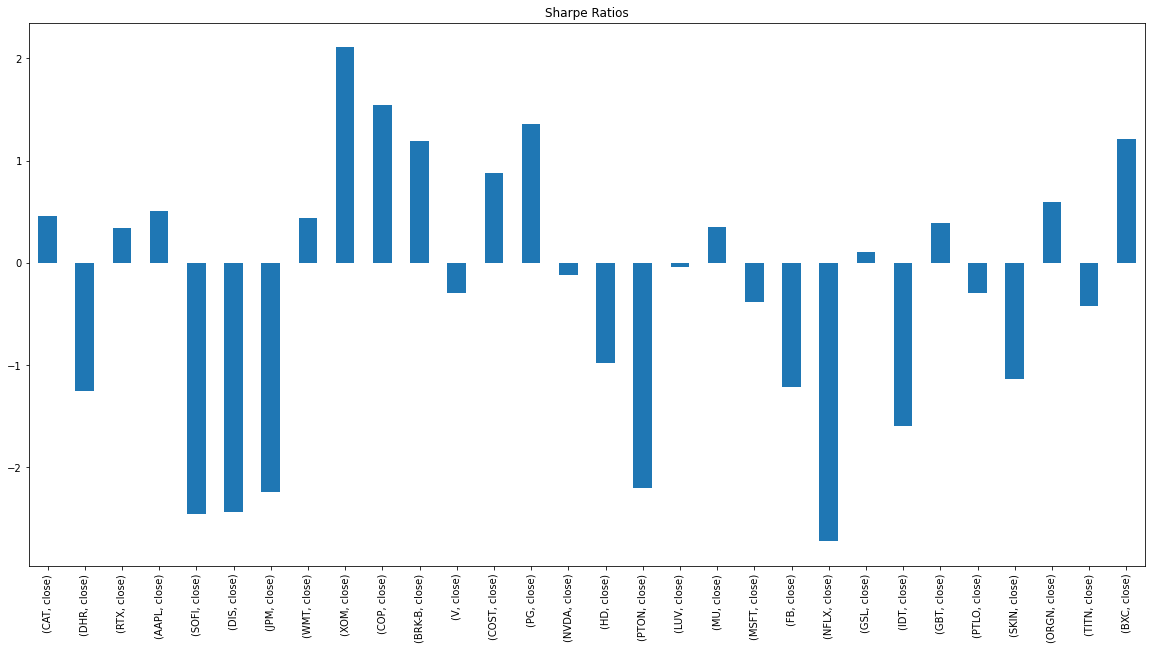

In [23]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratios.plot(kind='bar', figsize=(20,10), title='Sharpe Ratios')

In [24]:
# pos_sharpes = []
# for ratios in sharpe_ratios:
#     if ratio > 0:
#         pos_sharpes.append(ratios)
# pos_sharpes

In [25]:
# calculate daily returns of market
snp_returns = SPY.pct_change().dropna()
snp_returns

,close
timestamp,
2021-10-22 04:00:00+00:00,-0.001036
2021-10-25 04:00:00+00:00,0.005363
2021-10-26 04:00:00+00:00,0.000900
2021-10-27 04:00:00+00:00,-0.004430
2021-10-28 04:00:00+00:00,0.009649
2021-10-29 04:00:00+00:00,0.002029
2021-11-01 04:00:00+00:00,0.001720
2021-11-02 04:00:00+00:00,0.004043
2021-11-03 04:00:00+00:00,0.006105


In [26]:
#calculate market variance 
market_variance = snp_returns.var()
market_variance

close    0.000154
dtype: float64

In [27]:
# calculate CAT covariance 
CAT_cov = daily_returns['CAT']['close'].cov(snp_returns['close'])
CAT_cov

7.413994332876931e-05

In [28]:
cat_beta = CAT_cov / market_variance
cat_beta

close    0.480596
dtype: float64

In [29]:
daily_returns = daily_returns.drop(columns=[

SyntaxError: unexpected EOF while parsing (3435813282.py, line 1)